# Importer toutes les librairies necessaires 

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import rcParams


import warnings
warnings.filterwarnings("ignore")

# Lecture du Dataset

In [2]:
dct = pd.read_csv('C:/Users/pc/Downloads/iris.csv')
dct

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# Exploratory Data Analysis EDA 

In [3]:
dct.head() #  charger les premieres 5 lignes 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dct.tail() #  charger les dernieres 5 lignes 


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
dct.rename(columns={'SepalLengthCm':'SepalLength', 'SepalWidthCm':'SepalWidth','PetalLengthCm':'PetalLength','PetalWidthCm':'PetalWidth'}, inplace=True)
# rennomer les colonne  

In [6]:
dct['Species'].replace({'Iris-virginica':'virginica','Iris-setosa':'setosa','Iris-versicolor':'versicolor'},inplace=True)
# remplacer the Iris-virginica par  virginica dans la colonne Species 
# remplacer the Iris-setosa par setosa dans la colonne Species 
# remplacer the Iris-versicolor par  versicolor dans la colonne Species 

In [7]:
dct=dct.drop("Id", axis=1)
#  Supprimer la colonne Id du dataset

In [8]:
dct.info() #  donne le Summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Verification des valeurs nulles 

In [9]:
dct.isna().sum() #  Donne la somme des valeurs nulles dans le datset

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

In [10]:
dct.describe()
# Donne les informations statistiques  comme le count, mean,standard deviation, minimum value, quartile

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Visualization & Matrice de correlation 

In [11]:
correlation = dct.corr()
correlation

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


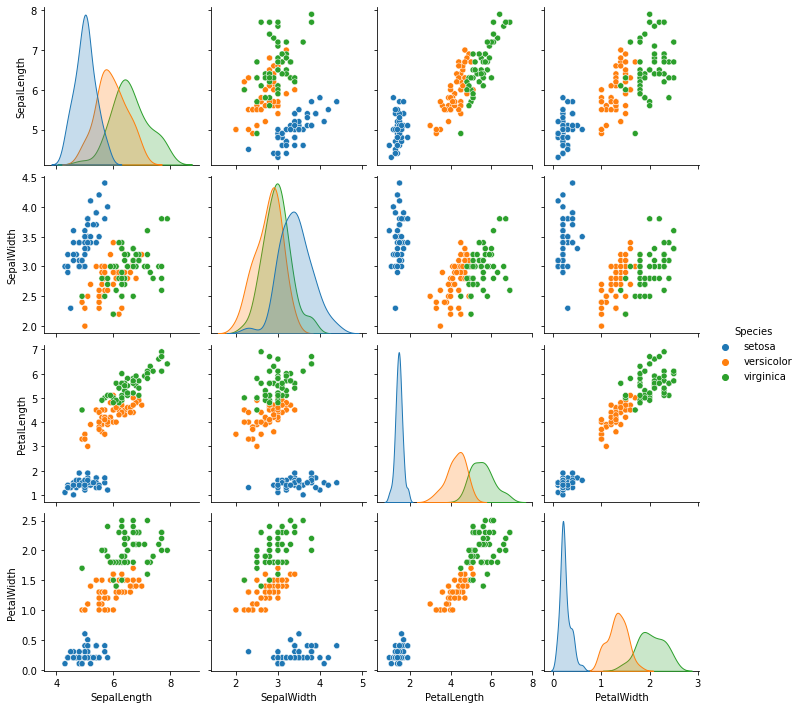

In [12]:
sns.pairplot(dct, hue='Species')

# La couleur bleu montre the setosa
# La couleur orange montre the versicolor
# La couleur verte montre the virginica

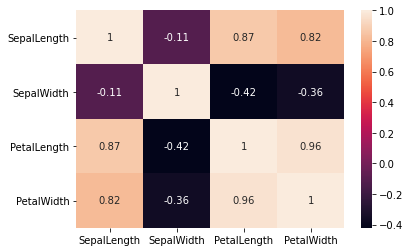

In [13]:
sns.heatmap(dct.corr(),annot=True)

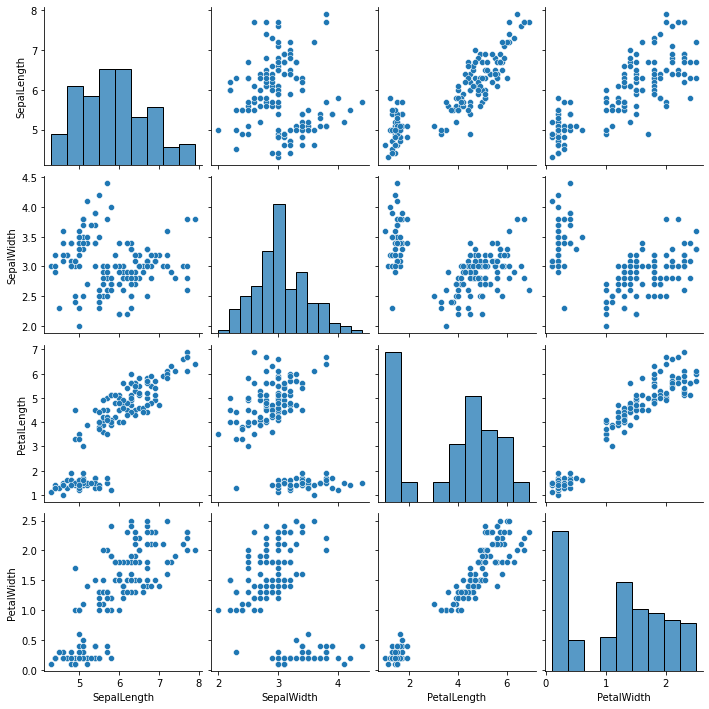

In [14]:
sns.pairplot(dct)

In [15]:
pd.DataFrame(dct.Species).value_counts()


Species   
setosa        50
versicolor    50
virginica     50
dtype: int64

# Data Preprocessing

In [16]:
X=dct.iloc[:,[0,1,2,3]]
y=dct.Species
y
dct.shape

(150, 5)

In [17]:
X.shape

(150, 4)

In [18]:
y.shape

(150,)

# Train and Test split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape

(120, 4)

In [21]:
X_test.shape

(30, 4)

# Appliquer Decision Tree

In [22]:
clf = DecisionTreeClassifier(criterion='entropy')

In [23]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [24]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [25]:
pd.DataFrame(dct.Species).value_counts()

Species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [26]:
accuracy_score(y_train, y_pred_train)

1.0

In [27]:
accuracy_score(y_test, y_pred_test)

0.9666666666666667

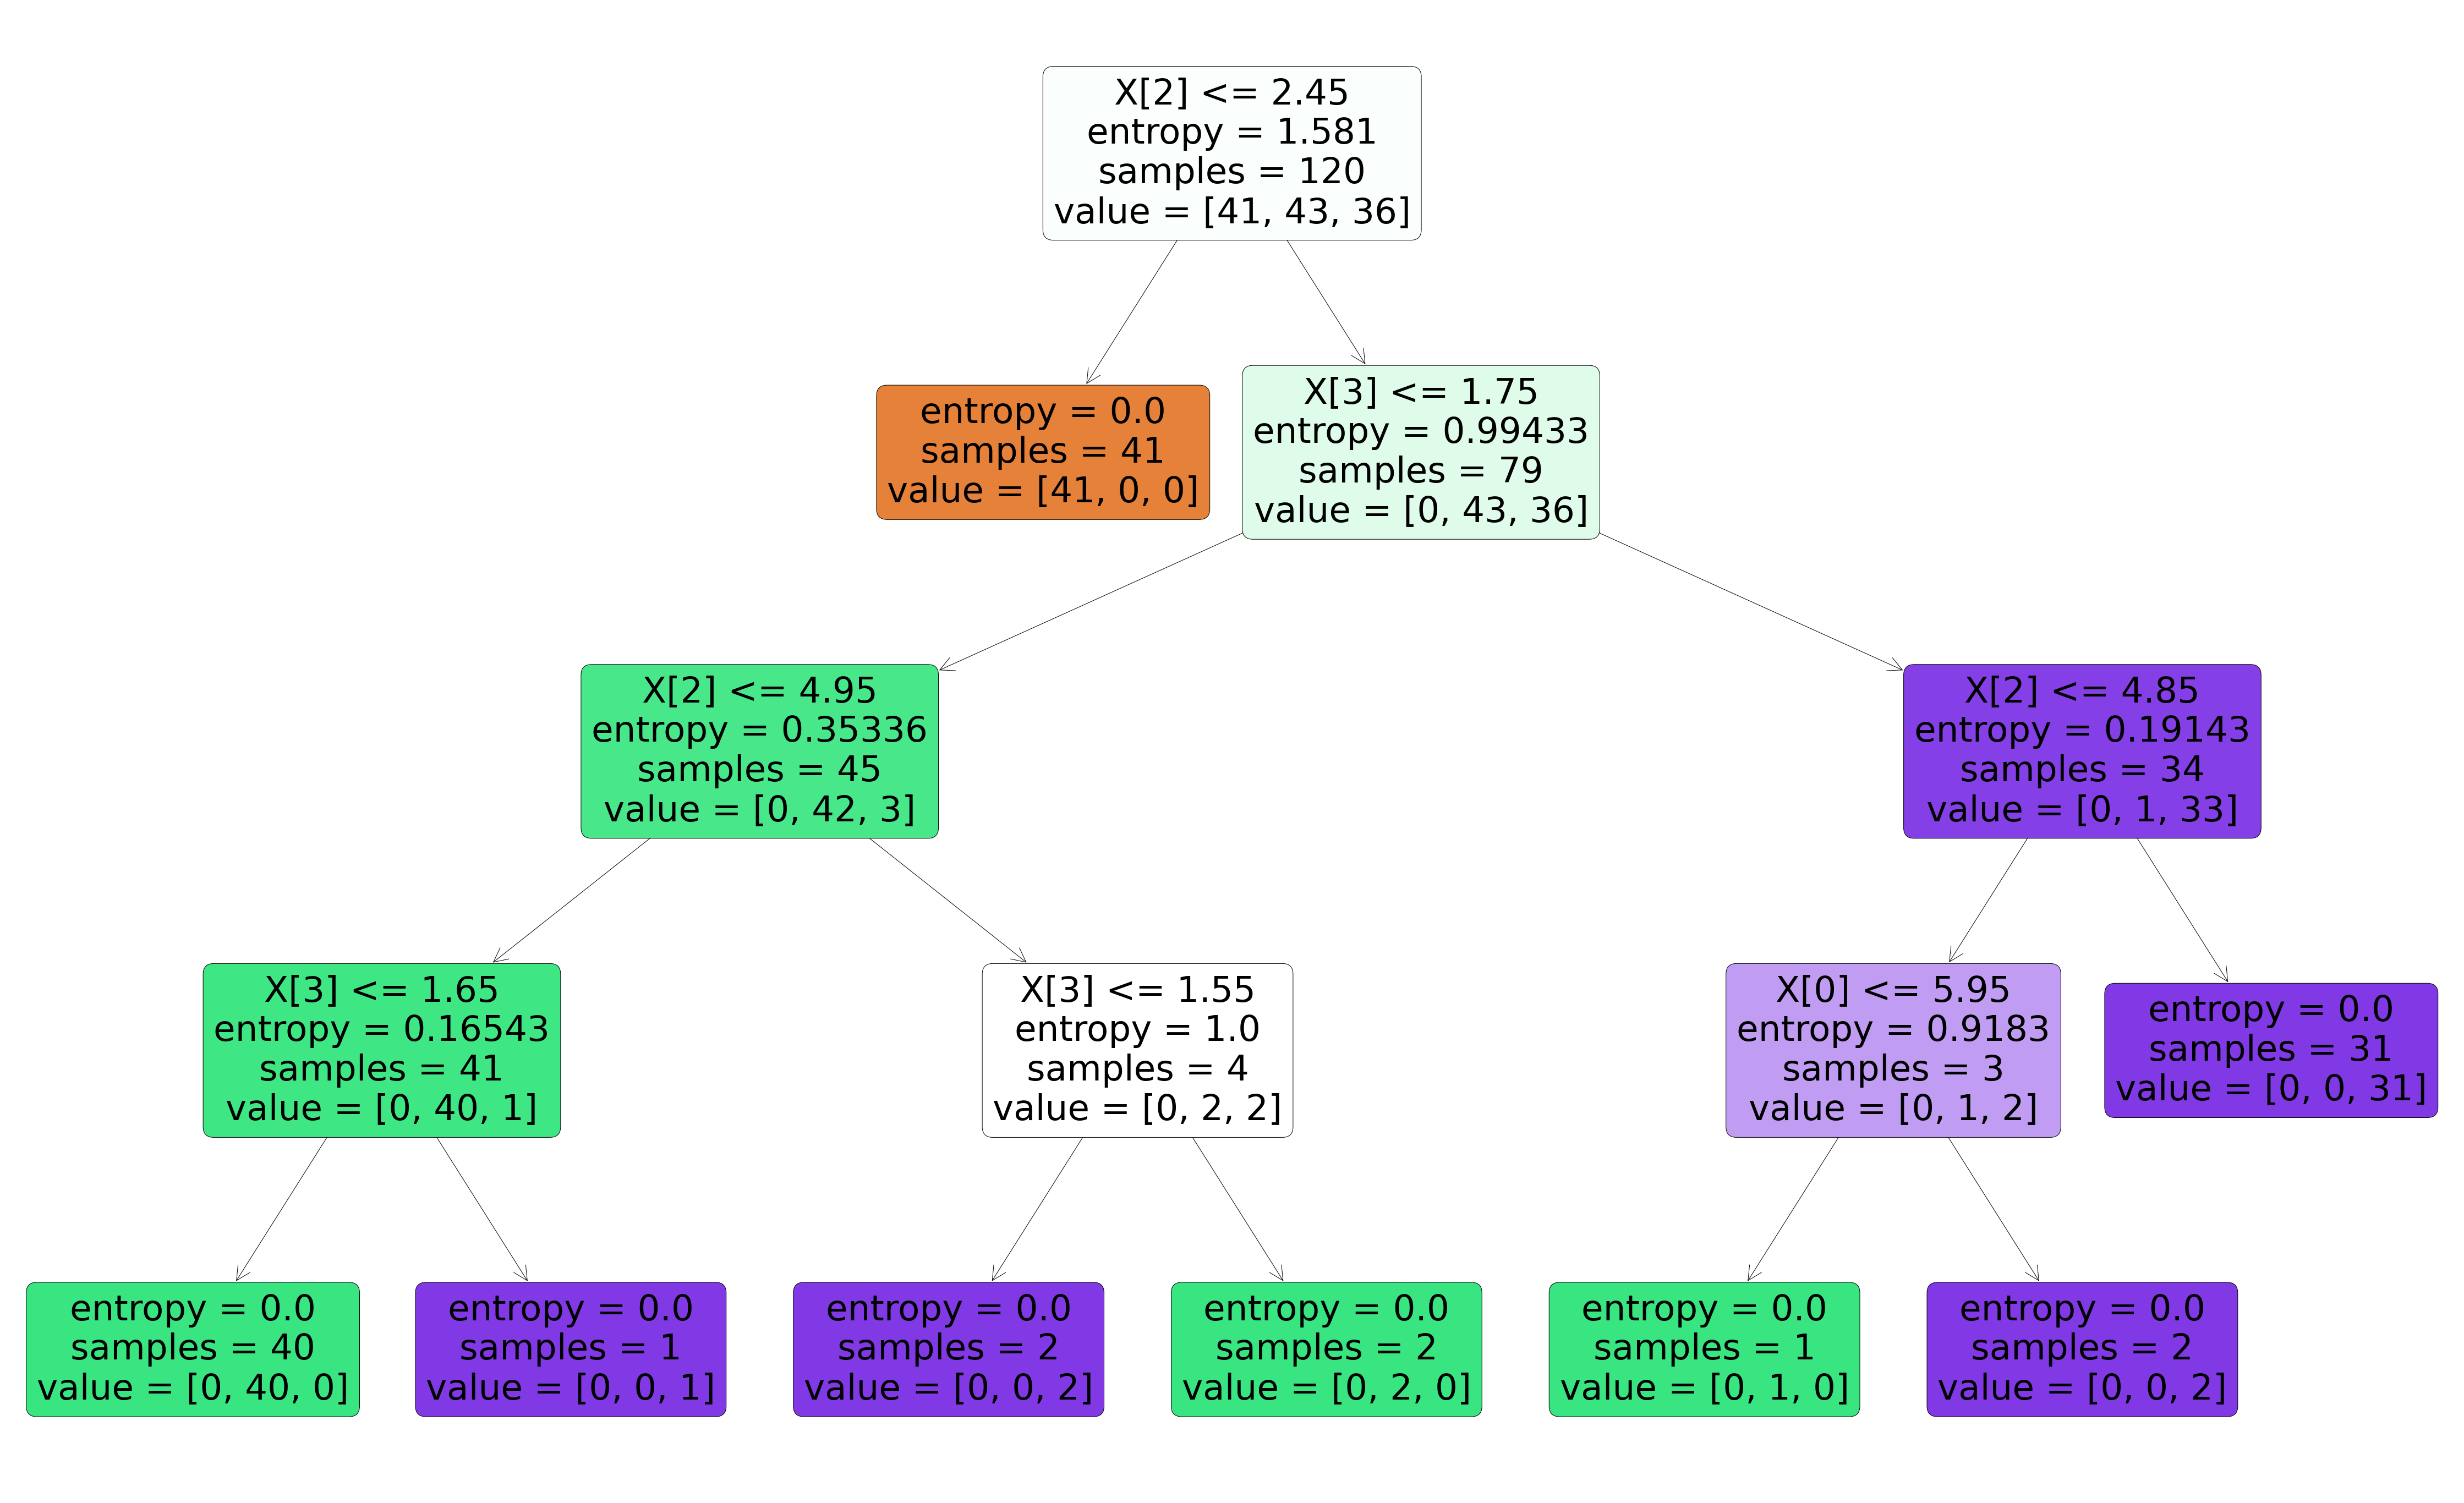

In [28]:
rcParams['figure.figsize'] = 80, 50
plot_tree(clf,precision=5,rounded=True,filled=True);